## Install Pyspark, Create Spark Session And Load the Data



In [ ]:
# Create Spark Session
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('NetflixEDA').getOrCreate()

In [ ]:
spark

In [ ]:
# Load Data of subscription fees

df = spark.read.csv('Data/Netflix subscription fee Dec-2021.csv', header=True, inferSchema=True)

In [ ]:
# inspect infer schema
df.printSchema()

root
 |-- Country_code: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Total Library Size: integer (nullable = true)
 |-- No. of TV Shows: integer (nullable = true)
 |-- No. of Movies: integer (nullable = true)
 |-- Cost Per Month - Basic ($): double (nullable = true)
 |-- Cost Per Month - Standard ($): double (nullable = true)
 |-- Cost Per Month - Premium ($): double (nullable = true)



In [ ]:
# defining Manual Schema

from pyspark.sql.types import StructType, StructField, StringType, FloatType, IntegerType

# define schema
manualSchema = StructType([
    StructField("Country_code", StringType(), True),
    StructField("Country", StringType(), True),
    StructField("Total Library Size", IntegerType(), True),
    StructField("No. of TV Shows", IntegerType(), True),
    StructField("No. of Movies", IntegerType(), True),
    StructField("Cost Per Month - Basic ($)", FloatType(), True),
    StructField("Cost Per Month - Standard ($)", FloatType(), True),
    StructField("Cost Per Month - Premium ($)", FloatType(), True),
])

In [ ]:
# Again Load the data with Manual Schema
df = spark.read.csv('Data/Netflix subscription fee Dec-2021.csv', header=True, schema=manualSchema)

In [ ]:
type(df)

pyspark.sql.dataframe.DataFrame

In [ ]:
df.printSchema()

root
 |-- Country_code: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Total Library Size: integer (nullable = true)
 |-- No. of TV Shows: integer (nullable = true)
 |-- No. of Movies: integer (nullable = true)
 |-- Cost Per Month - Basic ($): float (nullable = true)
 |-- Cost Per Month - Standard ($): float (nullable = true)
 |-- Cost Per Month - Premium ($): float (nullable = true)



In [ ]:
# We have string, integer and float data types, and all the columns can have null values.

# We are gonna rename the columns to avoid issues with symbols, etc.

new_names = [
    'countryCode',
    'country',
    'totalLibrarySize',
    'numberTVShows',
    'numberMovies',
    'monthlyCostBasic',
    'monthlyCostStandard',
    'monthlyCostPremium'
]

df = df.toDF(*new_names)

## Quick Glance At Data

In [ ]:
# show first 5 rows
df.show(5)

+-----------+---------+----------------+-------------+------------+----------------+-------------------+------------------+
|countryCode|  country|totalLibrarySize|numberTVShows|numberMovies|monthlyCostBasic|monthlyCostStandard|monthlyCostPremium|
+-----------+---------+----------------+-------------+------------+----------------+-------------------+------------------+
|         ar|Argentina|            4760|         3154|        1606|            3.74|                6.3|              9.26|
|         au|Australia|            6114|         4050|        2064|            7.84|              12.12|             16.39|
|         at|  Austria|            5640|         3779|        1861|            9.03|              14.67|             20.32|
|         be|  Belgium|            4990|         3374|        1616|           10.16|              15.24|             20.32|
|         bo|  Bolivia|            4991|         3155|        1836|            7.99|              10.99|             13.99|
+-------

In [ ]:
# visualize as Pandas table
df.limit(5).toPandas()

,countryCode,country,totalLibrarySize,numberTVShows,numberMovies,monthlyCostBasic,monthlyCostStandard,monthlyCostPremium
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.260000
1,au,Australia,6114,4050,2064,7.84,12.12,16.389999
2,at,Austria,5640,3779,1861,9.03,14.67,20.320000
3,be,Belgium,4990,3374,1616,10.16,15.24,20.320000
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.990000


In [ ]:
# describe the dataset
df.describe().show()

+-------+-----------+---------+-----------------+------------------+------------------+------------------+-------------------+------------------+
|summary|countryCode|  country| totalLibrarySize|     numberTVShows|      numberMovies|  monthlyCostBasic|monthlyCostStandard|monthlyCostPremium|
+-------+-----------+---------+-----------------+------------------+------------------+------------------+-------------------+------------------+
|  count|         65|       65|               65|                65|                65|                65|                 65|                65|
|   mean|       NULL|     NULL|5314.415384615385|3518.9538461538464|1795.4615384615386|  8.36846140714792|  11.98999995451707|15.612922998575064|
| stddev|       NULL|     NULL|980.3226333124288| 723.0105555671635| 327.2797483099835|1.9378186644783801| 2.8639787613790837| 4.040672256237365|
|    min|         ar|Argentina|             2274|              1675|               373|              1.97|                3.

The average monthly costs for the different subscriptions are:
- Basic -> `$8.36`
- Standard -> `$11.99`
- Premium -> `$15.61`

The max and min monthly costs for the different subscriptions are:
- Basic -> Max monthly cost = `$12.88`; Min monthly cost = `$1.97`
- Standard -> Max monthly cost = `$20.46`; Min monthly cost = `$3.0`
- Premium -> Max monthly cost = `$26.96`; Min monthly cost = `$4.02`

In [ ]:
# look at all the countries in the dataset
df.select("countryCode", "country").show(df.count())

+-----------+--------------+
|countryCode|       country|
+-----------+--------------+
|         ar|     Argentina|
|         au|     Australia|
|         at|       Austria|
|         be|       Belgium|
|         bo|       Bolivia|
|         br|        Brazil|
|         bg|      Bulgaria|
|         ca|        Canada|
|         cl|         Chile|
|         co|      Colombia|
|         cr|    Costa Rica|
|         hr|       Croatia|
|         cz|       Czechia|
|         dk|       Denmark|
|         ec|       Ecuador|
|         ee|       Estonia|
|         fi|       Finland|
|         fr|        France|
|         de|       Germany|
|         gi|     Gibraltar|
|         gr|        Greece|
|         gt|     Guatemala|
|         hn|      Honduras|
|         hk|     Hong Kong|
|         hu|       Hungary|
|         is|       Iceland|
|         in|         India|
|         id|     Indonesia|
|         ie|       Ireland|
|         il|        Israel|
|         it|         Italy|
|         jp| 

In [ ]:
# Install pycountry
!pip install pycountry

In [ ]:
# some imports
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import pycountry

In [ ]:
# load geodata from geopandas
countries = gpd.read_file("ne_110m_admin_0_countries/")
countries.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


In [ ]:
# countries in our dataset
countries_data = df.select("countryCode", "country").toPandas()
countries_data.head()

,countryCode,country
0,ar,Argentina
1,au,Australia
2,at,Austria
3,be,Belgium
4,bo,Bolivia


In [ ]:
# convert country code to iso a3
country_codes = countries_data["countryCode"].values.tolist()
country_codes_a3 = []
names = []
for country in pycountry.countries:
    if country.alpha_2.lower() in country_codes:
        country_codes_a3.append(country.alpha_3)
        names.append(country.name)

In [ ]:
# check that all the countries code have been converted
assert len(country_codes_a3) == 65

In [ ]:
# add to data
countries_data["iso_a3"] = country_codes_a3
countries_data["name"] = names

In [ ]:
print(countries_data.shape)
countries_data.head()

(65, 4)


,countryCode,country,iso_a3,name
0,ar,Argentina,ARG,Argentina
1,au,Australia,AUS,Australia
2,at,Austria,AUT,Austria
3,be,Belgium,BEL,Belgium
4,bo,Bolivia,BGR,Bulgaria


In [ ]:
# check that there's geodata for all the countries in the dataset
countries[countries["ISO_A3"].isin(countries_data["iso_a3"])].shape

(57, 169)

In [ ]:
import numpy as np

# change "iso_a3" to "ISO_A3" to match the actual column name in 'countries' GeoDataFrame.
print(np.setdiff1d(countries_data["iso_a3"], countries[countries["ISO_A3"].isin(countries_data["iso_a3"])]["ISO_A3"]))

['FRA' 'GIB' 'HKG' 'LIE' 'MCO' 'NOR' 'SGP' 'SMR']


In [ ]:
# try to find them manually
# FRA -> France
countries.loc[countries["SOVEREIGNT"] == "France"]
print(countries.columns)

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)


In [ ]:
# GIB -> Gibraltar
countries.loc[countries["SOVEREIGNT"].str.contains("Gibraltar")]

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry


In [ ]:
# HKG -> Hong Kong
countries.loc[countries["SOVEREIGNT"].str.contains("Hong Kong")]

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry


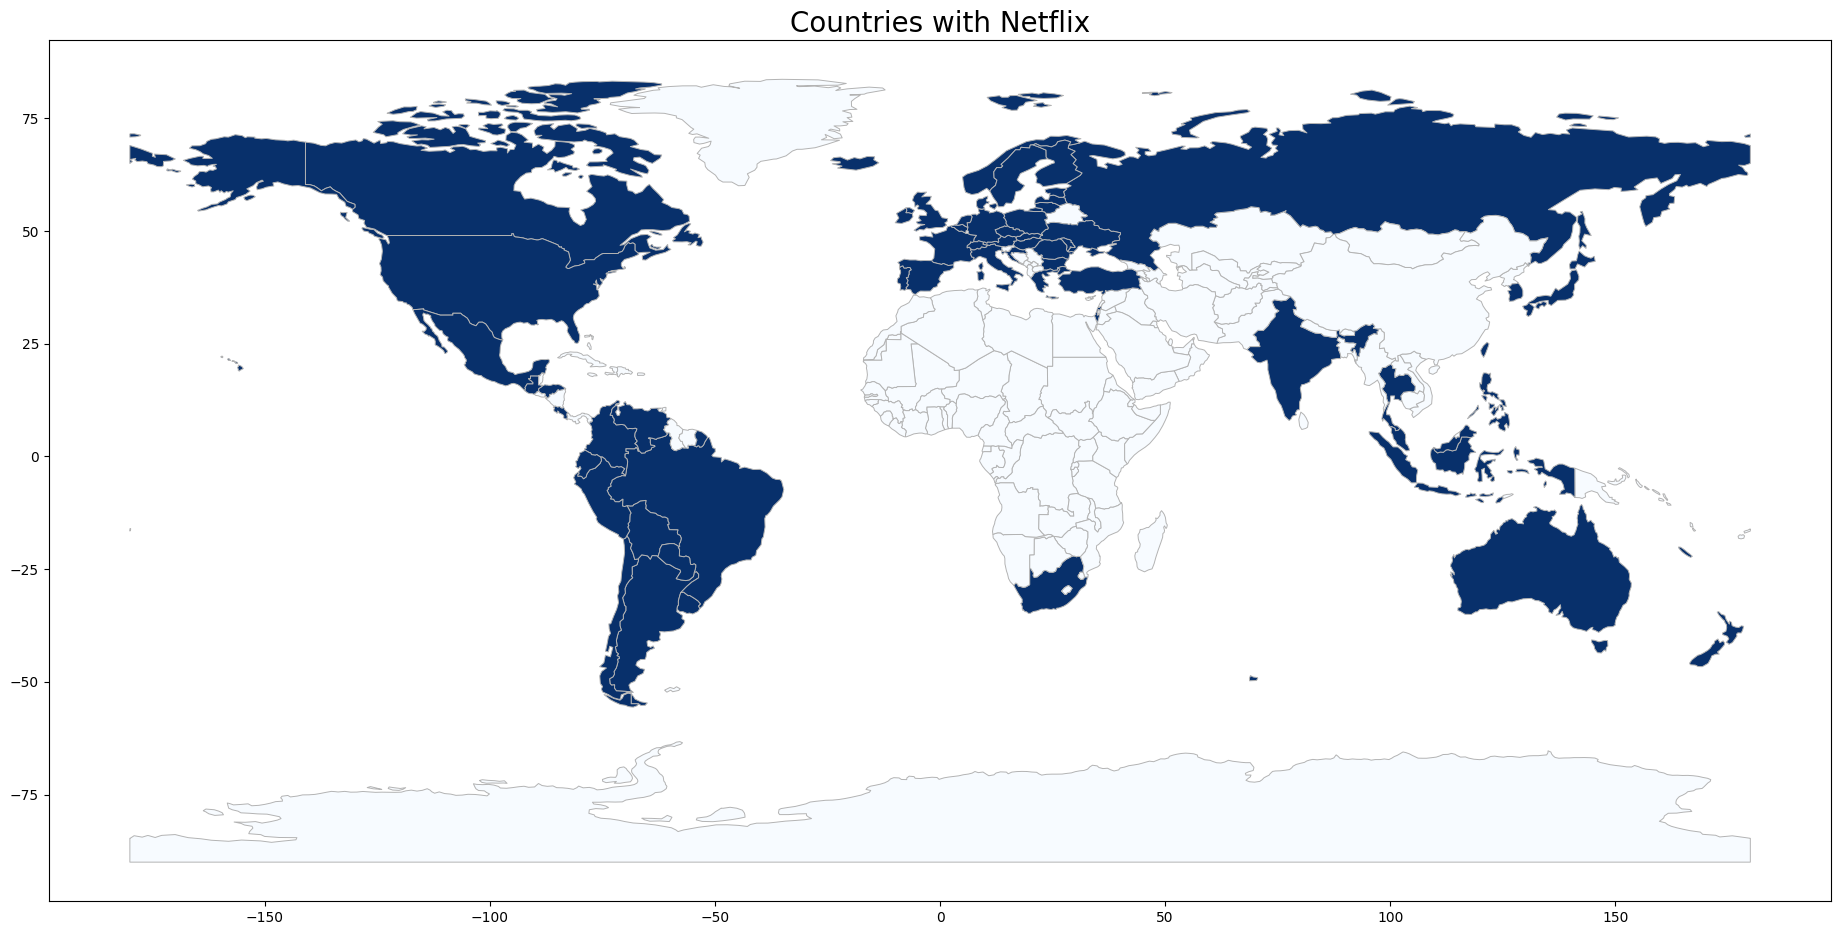

In [ ]:
# create a flag for plotting
countries["flag"] = countries["ISO_A3"].map(lambda x: 1 if x in countries_data["iso_a3"].values.tolist() else 0)
# manually add france and norway
countries.loc[countries["SOVEREIGNT"] == "France", "flag"] = 1
countries.loc[countries["SOVEREIGNT"] == "Norway", "flag"] = 1
# plot
fig, ax = plt.subplots(1, figsize=(23, 13))
countries.plot(column="flag", linewidth=0.7, ax=ax, cmap="Blues", edgecolor='0.7')
plt.title("Countries with Netflix", fontsize=20)
plt.show();

In [ ]:
# check for missing values in the data
from pyspark.sql.functions import isnan, when, count, col

df.select([count(when(isnan(c), c)).alias(c) for c in df.columns]).show()

+-----------+-------+----------------+-------------+------------+----------------+-------------------+------------------+
|countryCode|country|totalLibrarySize|numberTVShows|numberMovies|monthlyCostBasic|monthlyCostStandard|monthlyCostPremium|
+-----------+-------+----------------+-------------+------------+----------------+-------------------+------------------+
|          0|      0|               0|            0|           0|               0|                  0|                 0|
+-----------+-------+----------------+-------------+------------+----------------+-------------------+------------------+



## Eda

In [ ]:
# drop string cols
no_str_df = df.drop("countryCode", "country")

In [ ]:
# Correlation with Pyspark
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation

vector_col = "corr_vars"
assembler = VectorAssembler(inputCols=no_str_df.columns, outputCol=vector_col)
df_vector = assembler.transform(no_str_df).select(vector_col)
corr_matrix = Correlation.corr(df_vector, vector_col).collect()[0][0].toArray().tolist()

In [ ]:
corr_matrix_df = spark.createDataFrame(corr_matrix, no_str_df.columns)
corr_matrix_df.show()

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|    totalLibrarySize|       numberTVShows|        numberMovies|    monthlyCostBasic| monthlyCostStandard|  monthlyCostPremium|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|                 1.0|  0.9711459692193751|  0.8499574080179413|-0.06287684999485411|-0.05519986931782366| -0.0715210569386201|
|  0.9711459692193751|                 1.0|  0.6997860988691629|-0.00381400892363...|0.002284882447594...|-0.01109980833468...|
|  0.8499574080179413|  0.6997860988691629|                 1.0|-0.17991345555167165|-0.17039146376748412|-0.18971058430966617|
|-0.06287684999485411|-0.00381400892363...|-0.17991345555167165|                 1.0|   0.898534825160934|  0.8209140310212804|
|-0.05519986931782366|0.002284882447594...|-0.17039146376748412|   0.898534825160934|                 1.

In [ ]:
plot_corr = corr_matrix_df.toPandas()
plot_corr.index = corr_matrix_df.columns
plot_corr.style.background_gradient(cmap='Blues')

,totalLibrarySize,numberTVShows,numberMovies,monthlyCostBasic,monthlyCostStandard,monthlyCostPremium
totalLibrarySize,1.000000,0.971146,0.849957,-0.062877,-0.055200,-0.071521
numberTVShows,0.971146,1.000000,0.699786,-0.003814,0.002285,-0.011100
numberMovies,0.849957,0.699786,1.000000,-0.179913,-0.170391,-0.189711
monthlyCostBasic,-0.062877,-0.003814,-0.179913,1.000000,0.898535,0.820914
monthlyCostStandard,-0.055200,0.002285,-0.170391,0.898535,1.000000,0.978768
monthlyCostPremium,-0.071521,-0.011100,-0.189711,0.820914,0.978768,1.000000


In [ ]:
# compute spearman correlation coefficients
corr_matrix_s = Correlation.corr(df_vector, vector_col, "spearman").collect()[0][0].toArray().tolist()
corr_matrix_s_df = spark.createDataFrame(corr_matrix_s, no_str_df.columns)
corr_matrix_s_df.show()

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|    totalLibrarySize|       numberTVShows|        numberMovies|    monthlyCostBasic| monthlyCostStandard|  monthlyCostPremium|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|                 1.0|  0.9648030216385556|  0.8304588477422528|-0.01304269734527...| 0.08905556108997549| 0.06125899804498413|
|  0.9648030216385556|                 1.0|    0.70313234910995|0.027239294646323114| 0.14421890889615852| 0.11586873137906702|
|  0.8304588477422528|    0.70313234910995|                 1.0| -0.2158243121931077|-0.13665765822228126|-0.15907360596095219|
|-0.01304269734527...|0.027239294646323114| -0.2158243121931077|                 1.0|  0.8194576722398096|  0.6840374030205204|
| 0.08905556108997549| 0.14421890889615852|-0.13665765822228126|  0.8194576722398096|                 1.

In [ ]:
plot_corr_s = corr_matrix_s_df.toPandas()
plot_corr_s.index = corr_matrix_s_df.columns
plot_corr_s.style.background_gradient(cmap='Blues')

,totalLibrarySize,numberTVShows,numberMovies,monthlyCostBasic,monthlyCostStandard,monthlyCostPremium
totalLibrarySize,1.000000,0.964803,0.830459,-0.013043,0.089056,0.061259
numberTVShows,0.964803,1.000000,0.703132,0.027239,0.144219,0.115869
numberMovies,0.830459,0.703132,1.000000,-0.215824,-0.136658,-0.159074
monthlyCostBasic,-0.013043,0.027239,-0.215824,1.000000,0.819458,0.684037
monthlyCostStandard,0.089056,0.144219,-0.136658,0.819458,1.000000,0.951228
monthlyCostPremium,0.061259,0.115869,-0.159074,0.684037,0.951228,1.000000


## countires with most expensive netflix subscriptions

In [ ]:

from pyspark.sql.functions import avg

# define function to compute average across 3 cols
cols = [col('monthlyCostBasic'), col('monthlyCostStandard'), col('monthlyCostPremium')]
avgColsFunc = sum(x for x in cols) / len(cols)

In [ ]:
# Create new df with the avg cost col
dfWithAvg = df.withColumn('AverageSubsCost', avgColsFunc)
dfWithAvg.show(5)

+-----------+---------+----------------+-------------+------------+----------------+-------------------+------------------+------------------+
|countryCode|  country|totalLibrarySize|numberTVShows|numberMovies|monthlyCostBasic|monthlyCostStandard|monthlyCostPremium|   AverageSubsCost|
+-----------+---------+----------------+-------------+------------+----------------+-------------------+------------------+------------------+
|         ar|Argentina|            4760|         3154|        1606|            3.74|                6.3|              9.26| 6.433333079020183|
|         au|Australia|            6114|         4050|        2064|            7.84|              12.12|             16.39|12.116666158040365|
|         at|  Austria|            5640|         3779|        1861|            9.03|              14.67|             20.32|14.673333485921225|
|         be|  Belgium|            4990|         3374|        1616|           10.16|              15.24|             20.32|15.240000406901041|

In [ ]:
# Top 10 countries with most expensive subscriptions in absolute terms
dfWithAvg.select("country", "AverageSubsCost") \
    .orderBy(col("AverageSubsCost").desc()).limit(10).show()

+-------------+------------------+
|      country|   AverageSubsCost|
+-------------+------------------+
|Liechtenstein|20.099999745686848|
|  Switzerland|20.099999745686848|
|      Denmark|15.546666463216146|
|      Belgium|15.240000406901041|
|       France|15.240000406901041|
|       Israel|15.050000508626303|
|       Sweden|14.933333079020182|
|    Gibraltar|14.673333485921225|
|      Austria|14.673333485921225|
|        Italy|14.673333485921225|
+-------------+------------------+



In [ ]:
# Create new df with the avg cost col relative to library size
dfWithAvgRel = dfWithAvg.withColumn('AverageSubsCostPerTitle', dfWithAvg.AverageSubsCost / dfWithAvg.totalLibrarySize)
dfWithAvgRel.show(5)

+-----------+---------+----------------+-------------+------------+----------------+-------------------+------------------+------------------+-----------------------+
|countryCode|  country|totalLibrarySize|numberTVShows|numberMovies|monthlyCostBasic|monthlyCostStandard|monthlyCostPremium|   AverageSubsCost|AverageSubsCostPerTitle|
+-----------+---------+----------------+-------------+------------+----------------+-------------------+------------------+------------------+-----------------------+
|         ar|Argentina|            4760|         3154|        1606|            3.74|                6.3|              9.26| 6.433333079020183|   0.001351540562819366|
|         au|Australia|            6114|         4050|        2064|            7.84|              12.12|             16.39|12.116666158040365|   0.001981790343153478|
|         at|  Austria|            5640|         3779|        1861|            9.03|              14.67|             20.32|14.673333485921225|   0.002601654873390288

### Countries With Cheapest Netflix Subscription

In [ ]:
# Top 10 countries with most expensive subscriptions in relative terms
dfWithAvgRel.select("country", "AverageSubsCostPerTitle") \
    .orderBy(col("AverageSubsCostPerTitle").desc()).limit(10).show()

+-------------+-----------------------+
|      country|AverageSubsCostPerTitle|
+-------------+-----------------------+
|Liechtenstein|   0.006594488105540305|
|   San Marino|   0.006352092418147716|
|      Croatia|   0.004963353944642562|
|  Switzerland|   0.003650562975969...|
|       Sweden|   0.003424291006425...|
|      Denmark|   0.003410852668542...|
|      Finland|   0.003348166234315...|
|      Belgium|   0.003054108297976...|
|       Norway|   0.002934334556121287|
|      Moldova|   0.002866819118648003|
+-------------+-----------------------+



In [ ]:
# Top 10 countries with less expensive subscriptions in absolute terms
dfWithAvg.select("country", "AverageSubsCost") \
    .orderBy(col("AverageSubsCost").asc()).limit(10).show()

+------------+-----------------+
|     country|  AverageSubsCost|
+------------+-----------------+
|      Turkey|2.996666590372721|
|       India|5.950000127156575|
|   Argentina|6.433333079020183|
|    Colombia|7.033333460489909|
|      Brazil|7.226666768391927|
|     Ukraine|8.463333129882812|
|        Peru| 8.56000010172526|
| Philippines|9.140000025431315|
|South Africa|9.630000432332357|
|       Chile| 9.90666643778483|
+------------+-----------------+



In [ ]:
# Top 10 countries with most expensive subscriptions in relative terms
dfWithAvgRel.select("country", "AverageSubsCostPerTitle") \
    .orderBy(col("AverageSubsCostPerTitle").asc()).limit(10).show()

+-----------+-----------------------+
|    country|AverageSubsCostPerTitle|
+-----------+-----------------------+
|     Turkey|   6.459725351094463E-4|
|      India|   0.001018312532458767|
|  Argentina|   0.001351540562819366|
|   Colombia|   0.001409203257962314|
|Philippines|   0.001436655143890...|
|     Brazil|   0.001453472801366035|
|    Hungary|   0.001555781574090...|
|    Czechia|   0.001568600738143487|
|    Ukraine|   0.001586081920892581|
|   Slovakia|   0.001604359185517...|
+-----------+-----------------------+

